In [15]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
from remi_module.remi_module_import import *
import matplotlib.pyplot as plt

1000000 1000000 1000000
(1025, 978)
SNR = -16.86752718268967
Max iter reached
Max iter reached
(1025, 400)
Max iter reached


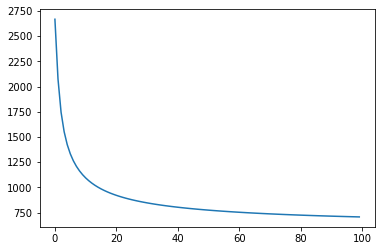

[[5.47713100e-02 2.00248635e-03 2.86275937e-04 ... 3.16179385e-01
  6.67123574e-02 1.50126318e-01]
 [4.95945510e-01 3.83395350e-02 4.34405065e-01 ... 3.26165326e-01
  1.39664065e-02 6.31468142e-01]
 [4.49062382e-05 5.68584748e-03 3.38905132e-01 ... 1.13154831e-01
  1.33452686e-02 3.48702569e-01]
 ...
 [2.83665256e-06 2.14905197e-03 1.18185770e-04 ... 1.27615962e-05
  1.96410450e-03 1.00326333e-05]
 [1.24886094e-05 5.06422497e-05 5.86205201e-06 ... 4.54095887e-06
  1.55688240e-04 3.00429518e-04]
 [7.64411201e-07 4.80809965e-05 1.67102633e-08 ... 5.08817794e-09
  1.20616849e-05 4.14535044e-05]]


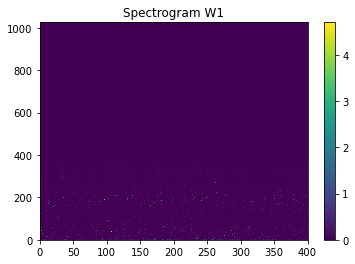

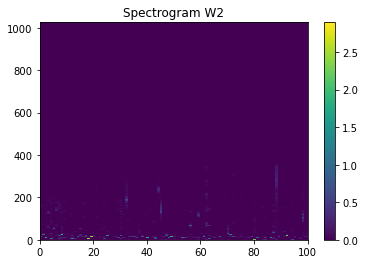

In [16]:
figsize = (10,8)

n_test = 3

tests = {
    0 : "speaker1_husky_noice_1_+20dB",
    1 : "auto_remi_6_husky_1.wav",
    2 : "remi_7_husky_1.wav",
    3 : "auto_remi_7_husky_1_+10dB.wav",
    4 : "auto_remi_7_husky_1_+20dB.wav",
    5 : "auto_remi_7_husky_1_-10dB.wav",
    6 : "remi_1_fan1_all_chan_0.wav",
}

def power(signal):
    return sum([pow(s, 2.0) for s in signal]) / len(signal)

AUDIO_NOISE_PATH = "audio/audio_noise/"
NOISE_PATH = "audio/noise/"
AUDIO_PATH = "audio/audio/"
RESULTS_PATH = "results/"

test = tests[n_test]

if test == "speaker1_husky_noice_1_+20dB":
    file_an = "speaker1_husky_noise_1.wav"
    file_a = "speaker1.wav"
    file_n = "husky_noise_1_+20dB.wav"

elif test == "auto_remi_6_husky_1.wav":
    file_an = "auto_remi_6_husky_1.wav"
    file_a = "remi_6.wav"
    file_n = "husky_noise_1.wav"

elif test == "remi_7_husky_1.wav":
    file_an = "remi_7_husky_1.wav"
    file_a = "remi_7.wav"
    file_n = "husky_noise_1.wav"

elif test == "auto_remi_7_husky_1_+10dB.wav":
    file_an = "auto_remi_7_husky_1_+10dB.wav"
    file_a = "remi_7.wav"
    file_n = "husky_noise_1_+10dB.wav"

elif test == "auto_remi_7_husky_1_-10dB.wav":
    file_an = "auto_remi_7_husky_1_-10dB.wav"
    file_a = "remi_7.wav"
    file_n = "husky_noise_1_-10dB.wav"

elif test == "auto_remi_7_husky_1_+20dB.wav":
    file_an = "auto_remi_7_husky_1_+20dB.wav"
    file_a = "remi_7.wav"
    file_n = "husky_noise_1_+20dB.wav"

elif test == "remi_1_fan1_all_chan_0.wav":
    file_an = "remi_1_fan1_all_chan_0.wav"
    file_a = "remi_1_dir0_far_all_chan_0.wav"
    file_n = "fan_1_all_chan_0.wav"

(fe_an, signal_an) = scipy.io.wavfile.read(AUDIO_NOISE_PATH + file_an)
(fe_a, signal_a) = scipy.io.wavfile.read(AUDIO_PATH + file_a)
(fe_n, signal_n) = scipy.io.wavfile.read(NOISE_PATH + file_n)

print(len(signal_an), len(signal_a), len(signal_n))

nperseg = 2048
_, _, Zxx_an = scipy.signal.stft(signal_an, fe_an, nperseg=nperseg)
_, _, Zxx_n = scipy.signal.stft(signal_n, fe_n, nperseg=nperseg)
_, _, Zxx_a = scipy.signal.stft(signal_a, fe_a, nperseg=nperseg)
print(Zxx_an.shape)
print("SNR =", np.log(power(signal_a) / power(signal_n)) * 10)

n_components_noise = 400
W1, _ = NMF(abs(Zxx_n), n_components=n_components_noise, max_iter=100, err=0.001)

n_components = 100
W2, _ = NMF(abs(Zxx_a), n_components=n_components, max_iter=100, err=0.001)
print(W1.shape)

n_components = 100
W1, H1, W2, H2, ress = SSNMF(abs(Zxx_an), W1=W1, W2=W2, n_components=n_components, max_iter=100, err=0.001)

plt.figure()

plt.plot(ress)
plt.show()

print(W1)

plt.figure()
plt.title("Spectrogram W1")
plt.pcolormesh(W1)
plt.colorbar()
plt.show()

plt.figure()
plt.title("Spectrogram W2")
plt.pcolormesh(W2)
plt.colorbar()
plt.show()

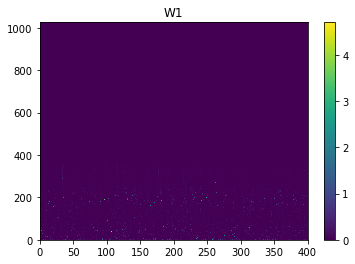

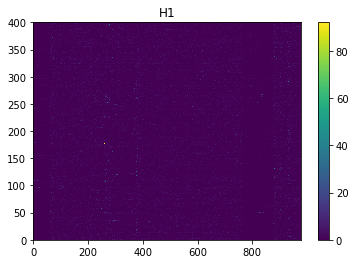

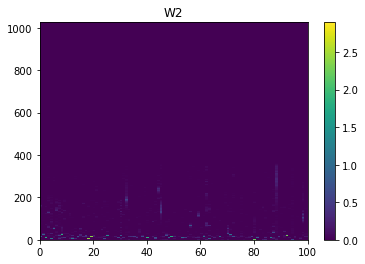

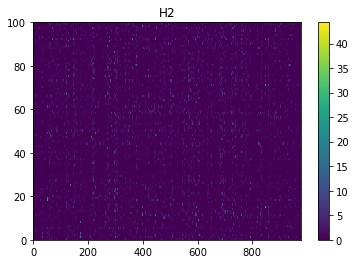

In [17]:

plt.figure()
plt.title("W1")
plt.pcolormesh(W1)
plt.colorbar()
plt.show()

plt.figure()
plt.title("H1")
plt.pcolormesh(H1)
plt.colorbar()
plt.show()

plt.figure()
plt.title("W2")
plt.pcolormesh(W2)
plt.colorbar()
plt.show()
# AIC BIC
plt.figure()
plt.title("H2")
plt.pcolormesh(H2)
plt.colorbar()
plt.show()

(1025, 400) (400, 978) (1025, 100) (100, 978)
(1025, 978)
(1025, 100) (100, 978)
(1025, 978)


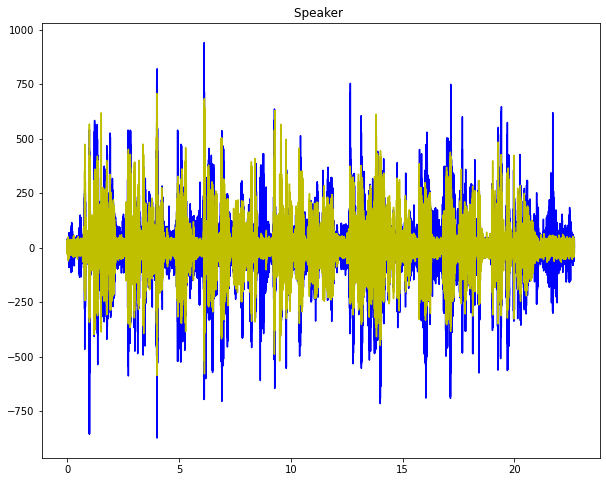

Difference score : 127650.33294967706


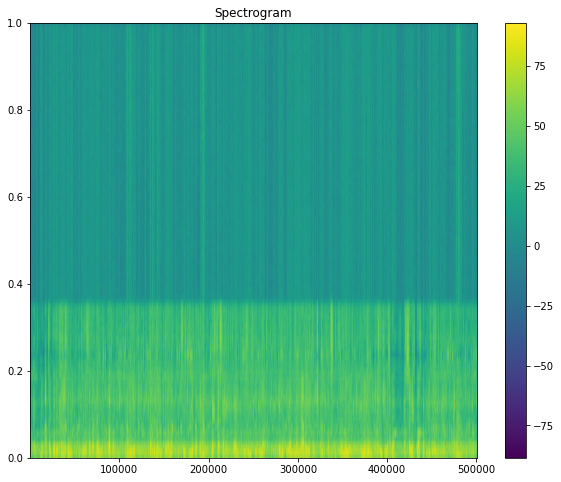

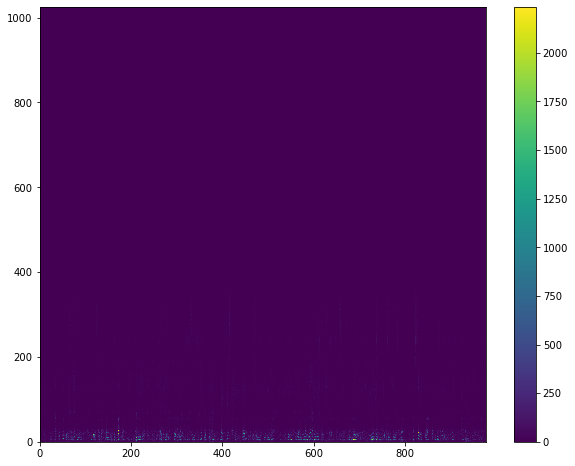

In [18]:
gain = 10
print(W1.shape, H1.shape, W2.shape, H2.shape)
phase = np.angle(Zxx_an)
print(phase.shape)

s = W2[:, :] @ H2[:, :]
print(W2[:, :].shape, H2[:, :].shape)
print(s.shape)
s = s * phase
X = scipy.signal.istft(s, fe_an, nperseg=nperseg)[1][:len(signal_a)]

plt.figure(figsize=figsize)
plt.title("Speaker ")
plt.plot([t / fe_an for t in range(len(X))], X, "b-")
plt.plot([t / fe_an for t in range(len(signal_a))], signal_a, "y-")
plt.show()

difference = np.linalg.norm(signal_a - X)
print("Difference score :", difference)

s = s * gain
X = scipy.signal.istft(s, fe_an, nperseg=nperseg)[1]

scipy.io.wavfile.write(RESULTS_PATH + "res_FSNMF_n" + str(n_components_noise) + "_k" + str(n_components) + ".wav", fe_an, np.array(X).astype(np.int16))






plt.figure(figsize=figsize)
[spec_an, freqs_an, t_an, _] = plt.specgram(X)
plt.title("Spectrogram")
plt.colorbar()
plt.show()

plt.figure(figsize=figsize)
plt.pcolormesh(abs(s))
plt.colorbar()
plt.show()